In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
covid_data = pd.read_csv("owid-covid-data.csv")

In [3]:
covid_data.shape

(103908, 60)

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103908 entries, 0 to 103907
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               103908 non-null  object 
 1   continent                              99068 non-null   object 
 2   location                               103908 non-null  object 
 3   date                                   103908 non-null  object 
 4   total_cases                            99800 non-null   float64
 5   new_cases                              99797 non-null   float64
 6   new_cases_smoothed                     98787 non-null   float64
 7   total_deaths                           89535 non-null   float64
 8   new_deaths                             89691 non-null   float64
 9   new_deaths_smoothed                    98787 non-null   float64
 10  total_cases_per_million                99270 non-null   

In [5]:
covid_data['location'].value_counts()

Argentina                          567
Mexico                             567
Thailand                           564
Peru                               562
Taiwan                             552
                                  ... 
Tuvalu                              50
Niue                                16
Pitcairn                             7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: location, Length: 231, dtype: int64

In [6]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
country = ['location', 'date']

total_deaths = ['total_deaths', 'total_deaths_per_million']

new_deaths = ['new_deaths_smoothed', 'new_deaths_smoothed_per_million']

vaccinations = ['total_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 
                'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                'new_vaccinations_smoothed_per_million']

factors = ['stringency_index','population', 'population_density', 'median_age', 'aged_65_older','aged_70_older', 
           'gdp_per_capita', 'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
           'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 
           'human_development_index', 'excess_mortality']

In [8]:
covid_sub = covid_data[country + total_deaths + new_deaths + vaccinations + factors]

In [9]:
missing_new_deaths = covid_sub['new_deaths_smoothed'].isna()
covid_sub = covid_sub.loc[~missing_new_deaths,:]

In [10]:
missing_total_deaths = covid_sub['total_deaths'].isna()
covid_sub = covid_sub.loc[~missing_total_deaths]

In [37]:
continents = ['Europe', 'South America', 'North America', 'Asia', 'Africa', 'Oceania']
continent_data = covid_sub.loc[covid_sub['location'].isin(continents),:]
continent_totals = continent_data[['location','total_deaths']].groupby('location').max()

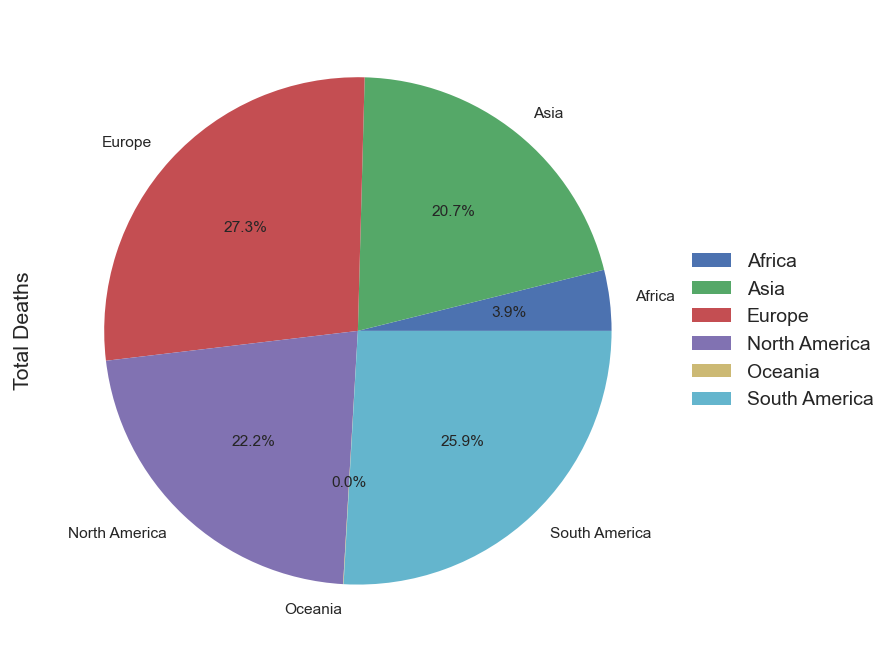

In [51]:
plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 140

continent_totals.plot(kind = 'pie', x = 'location', y = 'total_deaths', figsize = (6,6), autopct='%1.1f%%', fontsize = 8)

plt.ylabel('Total Deaths')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'Total deaths for each continent')

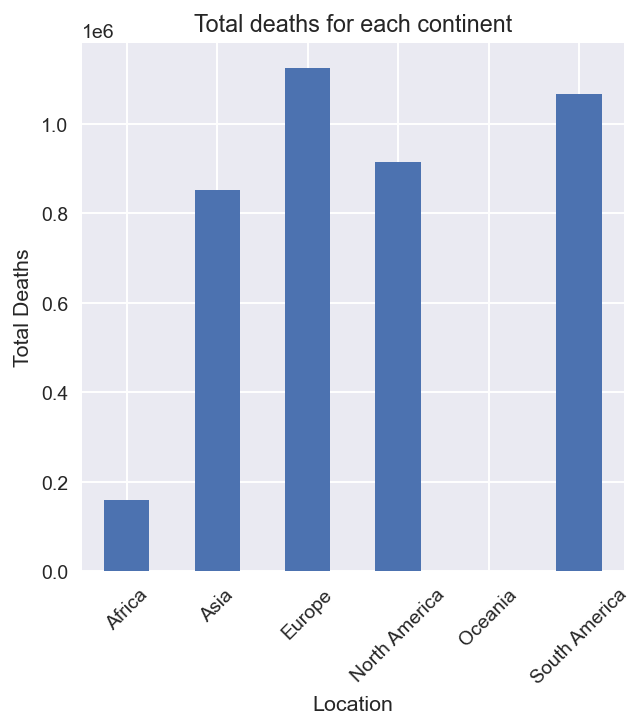

In [61]:
plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 140

continent_totals.plot(kind = 'bar', figsize = (5,5), legend = False, rot = 45)

plt.ylabel('Total Deaths')
plt.xlabel('Location')
plt.title('Total deaths for each continent')

Text(0.5, 1.0, 'Total deaths over time')

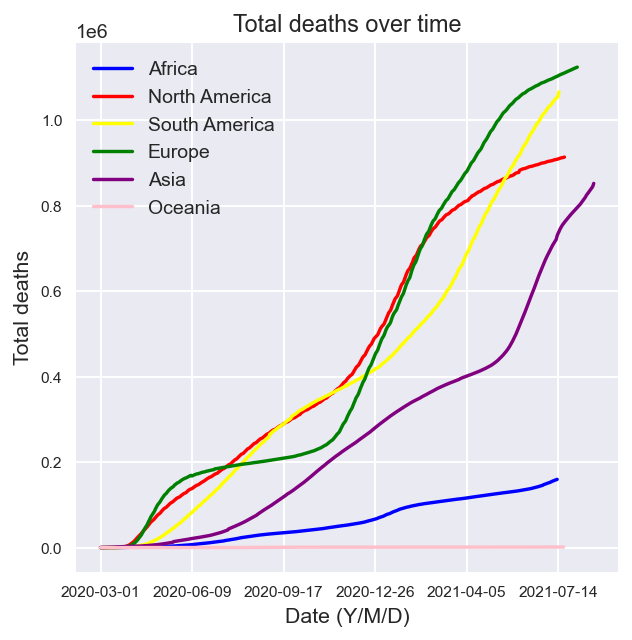

In [108]:
a = continent_data.loc[continent_data['location'] == 'Africa',['date','total_deaths']].plot(x = 'date', y = 'total_deaths', figsize = (5,5), fontsize = 8, c = 'blue', label = 'Africa')
continent_data.loc[continent_data['location'] == 'North America', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'red', label = 'North America')
continent_data.loc[continent_data['location'] == 'South America', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'yellow', label = 'South America')
continent_data.loc[continent_data['location'] == 'Europe', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'green', label = 'Europe')
continent_data.loc[continent_data['location'] == 'Asia', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'purple', label = 'Asia')
continent_data.loc[continent_data['location'] == 'Oceania', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'pink', label = 'Oceania')

plt.xlabel('Date (Y/M/D)')
plt.ylabel('Total deaths')
plt.title('Total deaths over time')